In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np 
import pandas as pd

In [ ]:
!unzip /content/drive/MyDrive/GTSRB.zip

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [23]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = "/content/GTSRB/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)


#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(42)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/GTSRB/0/
/content/GTSRB/1/
/content/GTSRB/2/
/content/GTSRB/3/
/content/GTSRB/4/
/content/GTSRB/5/
/content/GTSRB/6/
/content/GTSRB/7/
/content/GTSRB/8/
/content/GTSRB/9/
/content/GTSRB/10/
/content/GTSRB/11/
/content/GTSRB/12/
/content/GTSRB/13/
/content/GTSRB/14/
/content/GTSRB/15/
/content/GTSRB/16/
/content/GTSRB/17/
/content/GTSRB/18/
/content/GTSRB/19/
/content/GTSRB/20/
/content/GTSRB/21/
/content/GTSRB/22/
/content/GTSRB/23/
/content/GTSRB/24/
/content/GTSRB/25/
/content/GTSRB/26/
/content/GTSRB/27/
/content/GTSRB/28/
/content/GTSRB/29/
/content/GTSRB/30/
/content/GTSRB/31/
/content/GTSRB/32/
/content/GTSRB/33/
/content/GTSRB/34/
/content/GTSRB/35/
/content/GTSRB/36/
/content/GTSRB/37/
/content/GTSRB/38/
/content/GTSRB/39/
/content/GTSRB/40/
/content/GTSRB/41/
/content/GTSRB/42/


In [24]:
(X_train,X_val)=Cells[(int)(0.15*len(labels)):],Cells[:(int)(0.15*len(labels))]

X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

(y_train,y_val)=labels[(int)(0.15*len(labels)):],labels[:(int)(0.15*len(labels))]

print(X_train.shape)
print(X_val.shape)

(33328, 30, 30, 3)
(5881, 30, 30, 3)


In [25]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [26]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [27]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [28]:
X_test=X_val

y_test=y_val

In [29]:
epochs = 20
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/20
1042/1042 [==============================] - 139s 132ms/step - loss: 1.9004 - accuracy: 0.4844 - val_loss: 0.0999 - val_accuracy: 0.9726
Epoch 2/20
1042/1042 [==============================] - 136s 130ms/step - loss: 0.2028 - accuracy: 0.9353 - val_loss: 0.0368 - val_accuracy: 0.9920
Epoch 3/20
1042/1042 [==============================] - 137s 131ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.0362 - val_accuracy: 0.9906
Epoch 4/20
1042/1042 [==============================] - 137s 131ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.0204 - val_accuracy: 0.9954
Epoch 5/20
1042/1042 [==============================] - 137s 131ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0182 - val_accuracy: 0.9954
Epoch 6/20
1042/1042 [==============================] - 136s 130ms/step - loss: 0.0610 - accuracy: 0.9807 - val_loss: 0.0201 - val_accuracy: 0.9949
Epoch 7/20
1042/1042 [==============================] - 137s 131ms/step - loss: 0.0581 - accuracy: 0.9810 - val_

In [30]:
model.save("model.h5")

In [31]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.73%


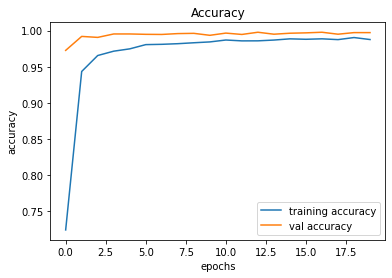

In [32]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

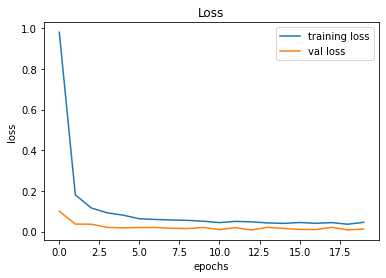

In [33]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()